# Stock Analysis Project
### By Nishita Kapoor 

In [1]:
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import yfinance as yf
from datetime import datetime
sns.set_style('whitegrid')

### Initialising tech_list with tickers of Apple, Google, Microsoft and Amazon.

In [2]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [3]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [4]:
info = []
global tech_list
for stock in tech_list:
    info.append(yf.download(stock, start = start,end=end))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## AAPL's info

In [5]:
info[0].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-30,90.019997,91.495003,90.000000,91.199997,90.589600,140223200
2020-07-01,91.279999,91.839996,90.977501,91.027496,90.418251,110737200
2020-07-02,91.962502,92.617500,90.910004,91.027496,90.418251,114041600
2020-07-06,92.500000,93.945000,92.467499,93.462502,92.836960,118655600
2020-07-07,93.852501,94.654999,93.057503,93.172501,92.548889,112424400


In [6]:
info[0].describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,121.670880,123.096927,120.050020,121.601828,121.236152,1.201105e+08
std,11.410582,11.351137,11.281341,11.320044,11.447686,5.310152e+07
min,90.019997,91.495003,89.144997,91.027496,90.418251,4.669130e+07
25%,115.699997,117.162498,114.007500,115.562500,114.996010,8.456650e+07
50%,123.519997,124.919998,121.839996,123.389999,123.180771,1.058613e+08
75%,129.410004,131.050003,128.460007,130.149994,130.138947,1.447120e+08
max,143.600006,145.089996,141.369995,143.160004,142.704010,3.743368e+08


In [7]:
info[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-06-30 to 2021-06-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


<AxesSubplot:title={'center':"Apple's Adjusted Close"}, xlabel='Date'>

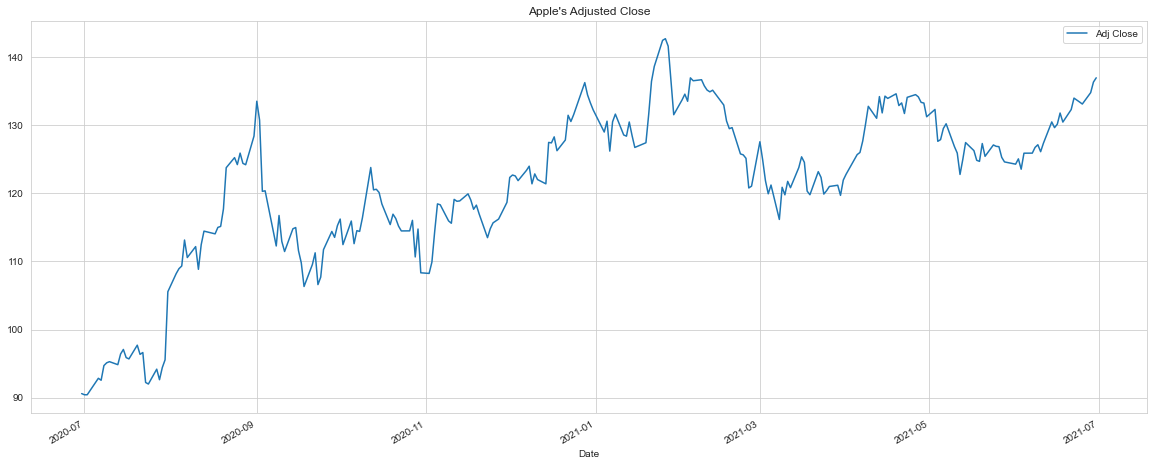

In [8]:
info[0]['Adj Close'].plot(legend=True,figsize=(20,8),title="Apple's Adjusted Close")

### Apple's adjusted close during a span of one year.

<AxesSubplot:title={'center':"Apple's Volume"}, xlabel='Date'>

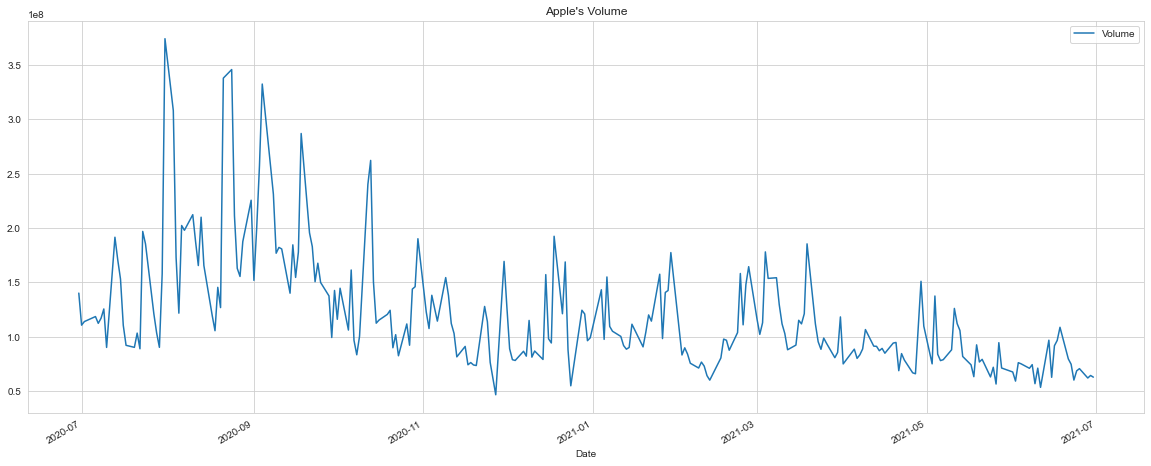

In [9]:
info[0]['Volume'].plot(legend='True',figsize=(20,8),title="Apple's Volume" )

### Apple's volume during a span of one year.

## Rolling Mean

In [10]:
ma_day=[10,20,50,60]

for i in range(len(ma_day)):
    column_name = f'Moving average for {ma_day[i]} days'
    info[0][column_name] = info[0]['Adj Close'].rolling(ma_day[i]).mean()

In [11]:
info[0].head()

,Open,High,Low,Close,Adj Close,Volume,Moving average for 10 days,Moving average for 20 days,Moving average for 50 days,Moving average for 60 days
Date,,,,,,,,,,
2020-06-30,90.019997,91.495003,90.000000,91.199997,90.589600,140223200,NaN,NaN,NaN,NaN
2020-07-01,91.279999,91.839996,90.977501,91.027496,90.418251,110737200,NaN,NaN,NaN,NaN
2020-07-02,91.962502,92.617500,90.910004,91.027496,90.418251,114041600,NaN,NaN,NaN,NaN
2020-07-06,92.500000,93.945000,92.467499,93.462502,92.836960,118655600,NaN,NaN,NaN,NaN
2020-07-07,93.852501,94.654999,93.057503,93.172501,92.548889,112424400,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Moving Averages'}, xlabel='Date'>

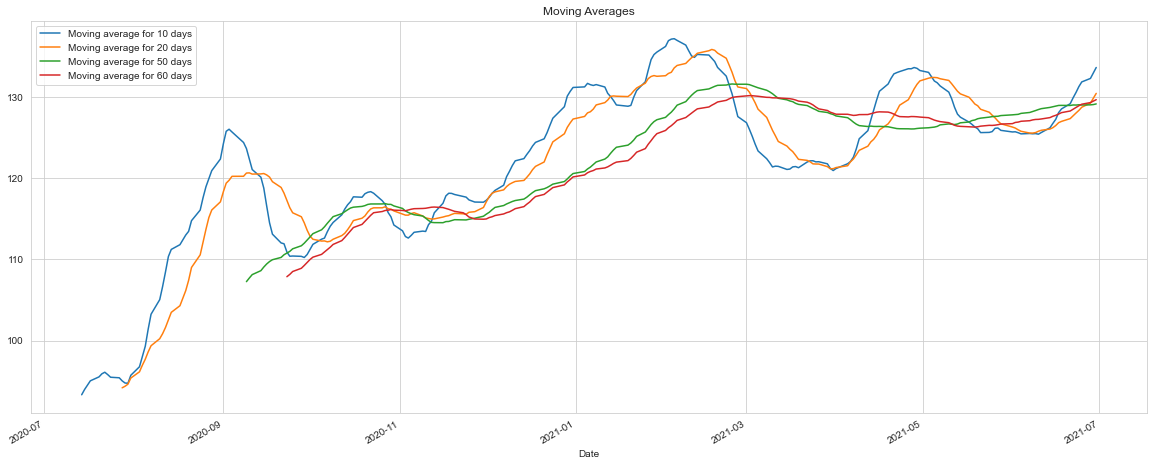

In [12]:
col_names = []
for i in range(len(ma_day)):
    temp = f'Moving average for {ma_day[i]} days'
    col_names.append(temp)

info[0][col_names].plot(legend=True,figsize=(20,8),title='Moving Averages')

### Graph showing moving averages for 10, 20, 50, 60 day intervals.

## Daily Percentage Change

<AxesSubplot:title={'center':'Daily Percentage Change'}, xlabel='Date'>

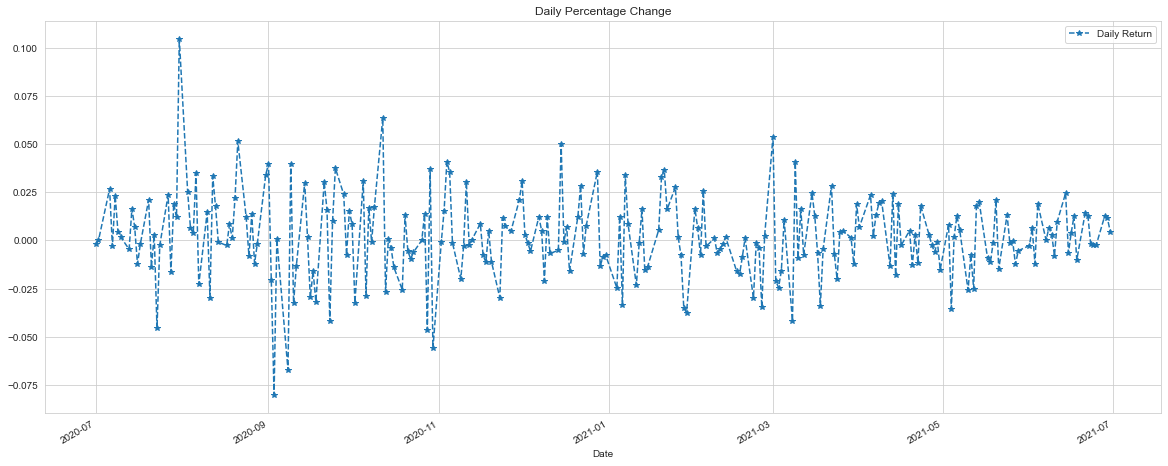

In [13]:
info[0]['Daily Return']=info[0]['Adj Close'].pct_change()
info[0]['Daily Return'].plot(legend=True,figsize=(20,8),marker='*',linestyle="--",title='Daily Percentage Change')


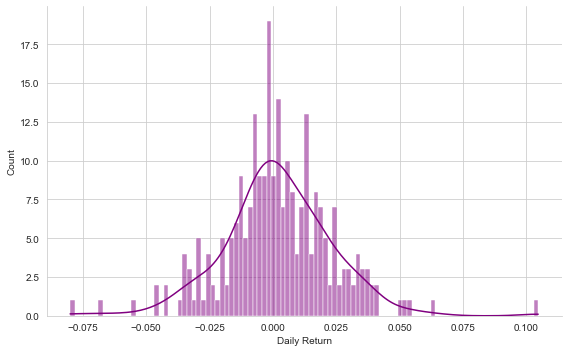

In [14]:
sns.displot(info[0]['Daily Return'].dropna(),bins=100,color='purple',kde=True,height=5,aspect=1.6)

In [15]:
read = yf.download(tech_list, start = start , end = end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


## Adjusted Close of Apple, Amazon, Google and Microsoft.

In [16]:
read.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-06-30,90.589600,2758.820068,1413.609985,201.558395
2020-07-01,90.418251,2878.699951,1438.040039,202.736984
2020-07-02,90.418251,2890.300049,1464.699951,204.282013
2020-07-06,92.836960,3057.040039,1495.699951,208.679443
2020-07-07,92.548889,3000.120117,1485.180054,206.252930


In [17]:
ret=read.pct_change()

### Percentage Changes of the following companies.

In [18]:
ret.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-06-30,NaN,NaN,NaN,NaN
2020-07-01,-0.001891,0.043453,0.017282,0.005847
2020-07-02,0.000000,0.004030,0.018539,0.007621
2020-07-06,0.026750,0.057690,0.021165,0.021526
2020-07-07,-0.003103,-0.018619,-0.007033,-0.011628


## Google VS Amazon scatter plot.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


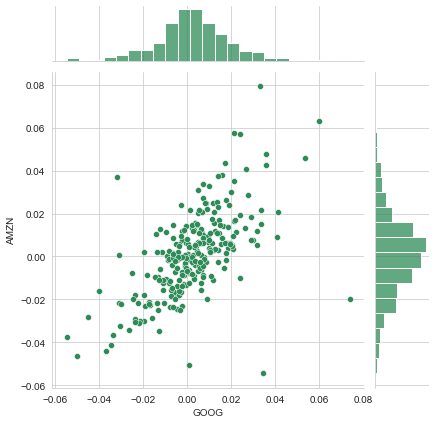

In [19]:
graph = sns.jointplot('GOOG','AMZN',ret,kind='scatter',color='seagreen')

In [20]:
read.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-06-30,90.589600,2758.820068,1413.609985,201.558395
2020-07-01,90.418251,2878.699951,1438.040039,202.736984
2020-07-02,90.418251,2890.300049,1464.699951,204.282013
2020-07-06,92.836960,3057.040039,1495.699951,208.679443
2020-07-07,92.548889,3000.120117,1485.180054,206.252930


## STATISTICAL GRAPHING IN PAIRS.

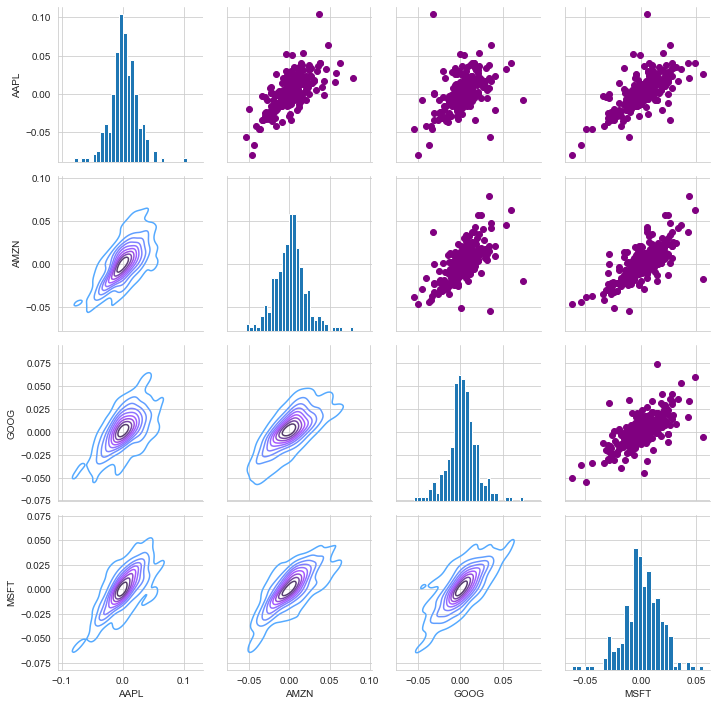

In [21]:
returns_fig=sns.PairGrid(ret.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


## CORRELATION HEATMAP

<AxesSubplot:>

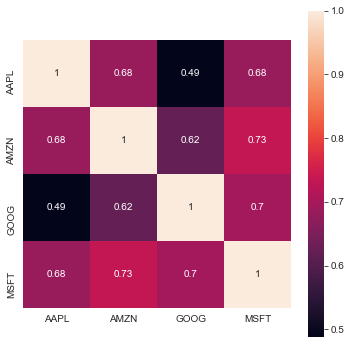

In [22]:
plt.figure(figsize=(6,6))
sns.heatmap(ret.dropna().corr(),square=True,annot=True)

### Amazon and Microsoft show the highest correlation coefficient while Apple and Google show the least correlation coefficient.

In [23]:
rets=ret.dropna()

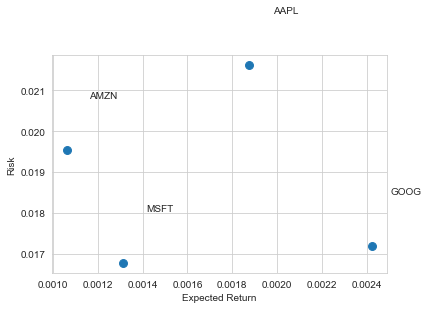

In [24]:
area=np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy=(x,y), 
        xytext=(50,50),
        textcoords = 'offset points', ha='right', va='bottom')

## Google has the lowest risk with highest returns while Apple has the highest risk with mediocre returns.